In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Read Noise2Seg Results

In [2]:
def get_measure(name, exp, run=1, fraction=0.5, measure='AP', score_type='validation_'):
    with open('/Users/prakash/Desktop/Noise2Seg_cluster/experiments/{}_{}_run{}/fraction_{}/{}scores.csv'.format(name, exp, run, fraction, score_type)) as f:
        line = f.readline()
        while line:
            line = line.strip().split(',')
            if line[0] == measure:
                return float(line[1])
            line = f.readline()
    return None

In [3]:
def read_Noise2Seg_results(name, exp, measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type=''):
    
    stats = []
    
    for frac in fractions:
        scores = []
        for r in runs:
            scores.append(get_measure(name, exp, run=r, fraction=frac, measure=measure, score_type=score_type))
        
        scores = np.array(scores)
        stats.append([frac, np.mean(scores), np.std(scores)/np.sqrt(scores.shape[0])])
    
    return np.array(stats)

# Fraction to #Images

In [4]:
def fraction_to_abs(fracs, max_num_imgs=3800):
    return np.round(max_num_imgs*fracs/100)

In [5]:
fraction_to_abs(4)

152.0

In [6]:
def read_voidseg_results(name):
    content = []
    with open('/Users/prakash/Desktop/fileserver_Noise2Seg/VoidSeg_Baselines/machine_readable/' + name) as f:
        line = f.readline()
        while line:
            content.append([float(x) for x in line.strip().split(" ")])
            line = f.readline()

    return np.array(content)

In [7]:
DSB_n10_AP_baseline = read_voidseg_results('DSB_n10_AP_baseline.txt')
DSB_n10_AP_sequential = read_voidseg_results('DSB_n10_AP_sequential.txt')
DSB_n10_AP_finetune = read_voidseg_results('DSB_n10_AP_finetune.txt')
DSB_n10_AP_finetuneSequential = read_voidseg_results('DSB_n10_AP_finetune-sequential.txt')

DSB_n10_SEG_baseline = read_voidseg_results('DSB_n10_SEG_baseline.txt')
DSB_n10_SEG_sequential = read_voidseg_results('DSB_n10_SEG_sequential.txt')
DSB_n10_SEG_finetune = read_voidseg_results('DSB_n10_SEG_finetune.txt')
DSB_n10_SEG_finetuneSequential = read_voidseg_results('DSB_n10_SEG_finetune-sequential.txt')

DSB_n10_SEGoptAP_baseline = read_voidseg_results('DSB_n10_SEGoptAP_baseline.txt')
DSB_n10_SEGoptAP_sequential = read_voidseg_results('DSB_n10_SEGoptAP_sequential.txt')
DSB_n10_SEGoptAP_finetune = read_voidseg_results('DSB_n10_SEGoptAP_finetune.txt')
DSB_n10_SEGoptAP_finetuneSequential = read_voidseg_results('DSB_n10_SEGoptAP_finetune-sequential.txt')

# DSB2018 n10: AP

In [8]:
DSB_n10_SEG_baseline

array([[  1.00000000e+01,   6.12584660e-01,   3.66116003e-02],
       [  1.90000000e+01,   6.70412366e-01,   1.63496609e-02],
       [  3.80000000e+01,   6.85692568e-01,   1.77824375e-02],
       [  7.60000000e+01,   7.14284560e-01,   6.00334860e-03],
       [  1.52000000e+02,   7.22858513e-01,   7.30483524e-03],
       [  3.04000000e+02,   7.36253735e-01,   2.89969495e-03],
       [  6.08000000e+02,   7.52301621e-01,   4.03904589e-03],
       [  1.21600000e+03,   7.64854225e-01,   2.95149891e-03],
       [  2.43200000e+03,   7.75649780e-01,   1.70216116e-03],
       [  3.80000000e+03,   7.79790120e-01,   2.11628035e-03]])

In [9]:
DSB_n10_SEG_sequential

array([[  1.00000000e+01,   6.35987702e-01,   1.85314291e-02],
       [  1.90000000e+01,   6.81248385e-01,   2.10120459e-02],
       [  3.80000000e+01,   6.99428948e-01,   1.06953806e-02],
       [  7.60000000e+01,   7.15976186e-01,   5.15847643e-03],
       [  1.52000000e+02,   7.22111465e-01,   3.79354937e-03],
       [  3.04000000e+02,   7.37680538e-01,   2.73956219e-03],
       [  6.08000000e+02,   7.53352459e-01,   1.60122695e-03],
       [  1.21600000e+03,   7.65027348e-01,   3.11329355e-03],
       [  2.43200000e+03,   7.68154911e-01,   1.24877013e-03],
       [  3.80000000e+03,   7.69878118e-01,   1.68596214e-03]])

In [10]:
sD0_dsb_n10 = read_Noise2Seg_results('fin', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [11]:
sD0_dsb_n10

array([[  2.50000000e-01,   5.63684892e-01,   1.18166905e-02],
       [  5.00000000e-01,   6.39597041e-01,   1.12360450e-02],
       [  1.00000000e+00,   6.70317643e-01,   1.02273075e-02],
       [  2.00000000e+00,   7.11357984e-01,   9.81685288e-03],
       [  4.00000000e+00,   7.45341406e-01,   6.54092937e-03],
       [  8.00000000e+00,   7.60402568e-01,   6.09580591e-03],
       [  1.60000000e+01,   7.81445449e-01,   5.20066966e-03],
       [  3.20000000e+01,   7.84784814e-01,   1.40175325e-03],
       [  6.40000000e+01,   7.95346518e-01,   4.78936730e-03],
       [  1.00000000e+02,   7.91445110e-01,   5.65286480e-03]])

In [12]:
sD0_dsb_n10_2 = read_Noise2Seg_results('finSeq', 'dsb_n10', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [13]:
sD0_dsb_n10_2

array([[  2.50000000e-01,   6.03350561e-01,   2.42093845e-03],
       [  5.00000000e-01,   6.47702271e-01,   1.51808668e-02],
       [  1.00000000e+00,   6.88919908e-01,   9.09089949e-03],
       [  2.00000000e+00,   7.12466573e-01,   5.21416561e-03],
       [  4.00000000e+00,   7.40362548e-01,   6.41420944e-03],
       [  8.00000000e+00,   7.63542059e-01,   6.07882649e-03],
       [  1.60000000e+01,   7.70576682e-01,   4.06517317e-03],
       [  3.20000000e+01,   7.86889315e-01,   4.53473710e-03],
       [  6.40000000e+01,   7.93585058e-01,   3.03479118e-03],
       [  1.00000000e+02,   7.98452826e-01,   2.78516626e-03]])

In [14]:
sD0_dsb_n10_3 = read_Noise2Seg_results('noEarlyStop_w_1_1', 'DSB_n10', measure='AP',runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0])

In [15]:
sD0_dsb_n10_3

array([[  2.50000000e-01,   6.53388828e-01,   2.03744644e-02],
       [  5.00000000e-01,   6.99428264e-01,   6.78441702e-03],
       [  1.00000000e+00,   7.09258516e-01,   4.77408080e-03],
       [  2.00000000e+00,   7.15463808e-01,   5.82077816e-03],
       [  4.00000000e+00,   7.44178193e-01,   3.74334714e-03],
       [  8.00000000e+00,   7.51099964e-01,   3.80725905e-03],
       [  1.60000000e+01,   7.74798578e-01,   2.91741092e-03],
       [  3.20000000e+01,   7.89261011e-01,   5.56245260e-03],
       [  6.40000000e+01,   7.98458038e-01,   2.54225364e-03],
       [  1.00000000e+02,   7.78553127e-01,   6.20200903e-03]])

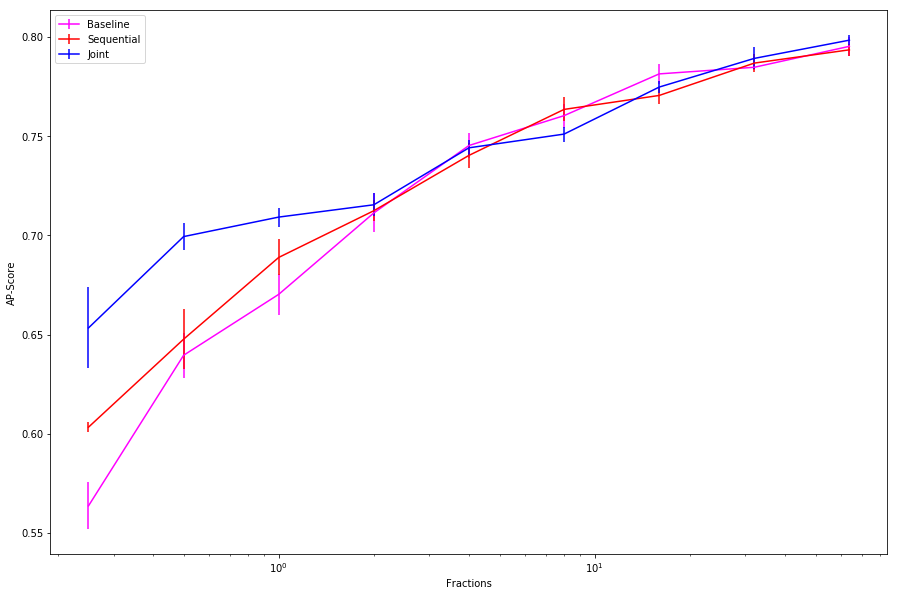

In [16]:
fig = plt.figure(figsize=(15,10))

plt.errorbar(sD0_dsb_n10[:-1, 0], 
             y = sD0_dsb_n10[:-1, 1], 
             yerr = sD0_dsb_n10[:-1, 2], 
            label='Baseline', color='magenta')

plt.errorbar(sD0_dsb_n10_2[:-1, 0], 
             y = sD0_dsb_n10_2[:-1, 1], 
             yerr = sD0_dsb_n10_2[:-1, 2], 
            label='Sequential', color='red')

# plt.errorbar(sD0_dsb_n10_2[:-1, 0], 
#              y = DSB_n10_AP_finetune[:-1, 1], 
#              yerr = DSB_n10_AP_finetune[:-1, 2], 
#             label='Finetune', color='pink')

# plt.errorbar(sD0_dsb_n10_2[:-1, 0], 
#              y = DSB_n10_AP_finetuneSequential[:-1, 1], 
#              yerr = DSB_n10_AP_finetuneSequential[:-1, 2], 
#             label='Finetune_Sequential', color='maroon')


plt.errorbar(sD0_dsb_n10_3[:-1, 0], 
             y = sD0_dsb_n10_3[:-1, 1], 
             yerr = sD0_dsb_n10_3[:-1, 2], 
            label='Joint', color='blue')
plt.semilogx()

plt.xlabel('Fractions')
plt.ylabel('AP-Score')
plt.legend()
plt.show()